# Socially Assistive Robots

## 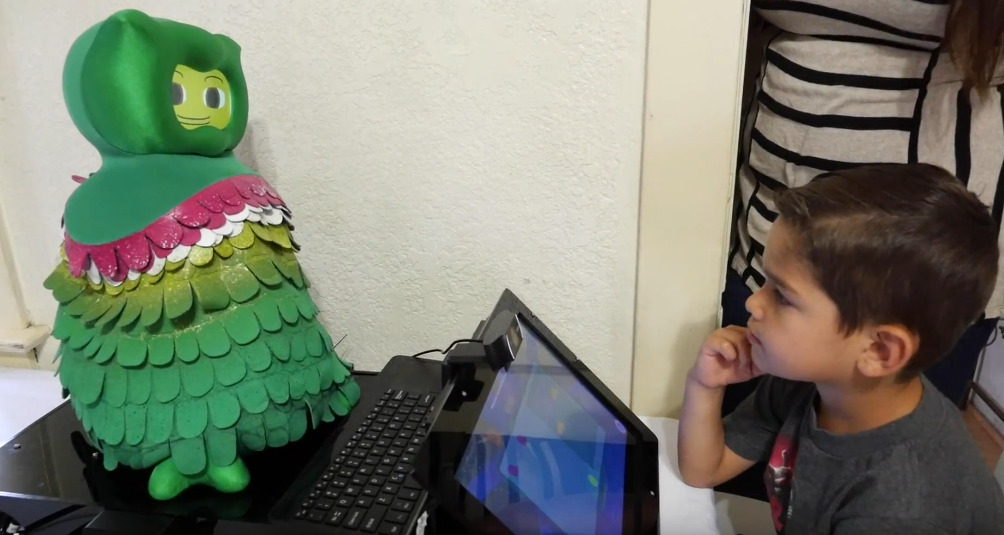

### Robots, such as the one above, are used to help children with learning or cognitive disabilities to build social skills. To do this, the robots use games and programs to help the child learn about child-family interactions. Yet these programs need to be tailored for the child's needs. If the child is not engaging with the activity, it might be harder for them to learn.
### For the robot to personalize the learning materials, it needs to identify when the child is engaged or not. Then the robot can changes its behavior based on the child's response. 

## How does the robot know whether a child is engaged or not? 
###  Engagement is the action of focusing a person's attention. To determine that the child is engaged, facial features and facial actions can be examined through the robot camera.
### Facial features are landmarks on the face, such as eyes, eyebrows, nose, lips, and more.
### Facial actions are movements of facial features, such as raising eyebrow, lowering eyebrow, or raising cheeks. 

## This program graphs the locations of facial features and facial actions that you input, and the robot will also try to predict if the child is engaged with the facial features/actions that you input

### The robot has a camera and can use computer vision to observe the child's behaviors. You will be able to see how the facial features and facial actions locations change over time, and see whether the child is engaged or not.
<span style="color:red; font-size:150%">Run the next cell by clicking run at the top</span>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
import lib
import graph_lib
from xgboost import XGBClassifier, plot_importance

C:\Users\ayush\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Facial Features
###  Below you can see examples of facial features, such as eyebrow, eye, jaw, nose, and lip positions.
## Eyebrow: 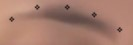

## Eye: 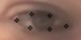

## Jaw: 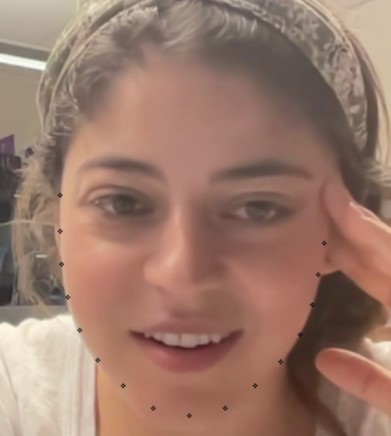

## Nose: 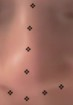

## Innerlip: 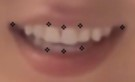

## Outerlip: 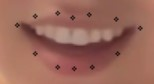

## Eye Gaze: 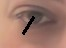

### In the next cell, you can specify which facial features to graph. It will graph the locations of the features. 
<span style="color:red; font-size:150%">Run the next cell, if you cannot see the checkmarks, then </span>

In [2]:
eyebrow = widgets.Checkbox(False, description='Eyebrows')
display(eyebrow)
def changed(b):
    try:
        graph_lib.feature[0] = 1
    except:
        pass
eyebrow.observe(changed)
eye = widgets.Checkbox(False, description='Eye')
display(eye)
def changed1(b):
    try:
        graph_lib.feature[1] = 1
    except:
        pass
eye.observe(changed1)
jaw = widgets.Checkbox(False, description='Jaw')
display(jaw)
def changed2(b):
    try:
        graph_lib.feature[2] = 1
    except:
        pass
jaw.observe(changed2)
nose = widgets.Checkbox(False, description='Nose')
display(nose)
def changed3(b):
    try:
        graph_lib.feature[3] = 1
    except:
        pass
nose.observe(changed3)
innerlip = widgets.Checkbox(False, description='Innerlip')
display(innerlip)
def changed4(b):
    try:
        graph_lib.feature[4] = 1
    except:
        pass
innerlip.observe(changed4)
outerlip = widgets.Checkbox(False, description='Outerlip')
display(outerlip)
def changed5(b):
    try:
        graph_lib.feature[5] = 1
    except:
        pass
outerlip.observe(changed5)
eyegaze = widgets.Checkbox(False, description='Eye gaze')
display(eyegaze)
def changed6(b):
    try:
        graph_lib.feature[6] = 1
    except:
        pass
eyegaze.observe(changed6)

Checkbox(value=False, description='Eyebrows')

Checkbox(value=False, description='Eye')

Checkbox(value=False, description='Jaw')

Checkbox(value=False, description='Nose')

Checkbox(value=False, description='Innerlip')

Checkbox(value=False, description='Outerlip')

Checkbox(value=False, description='Eye gaze')

# By running the next cell, you can graph the facial features that you selected above.
<span style="color:red; font-size:150%">Orange shading is disengaged, Blue is engaged</span>

In [4]:
graph_lib.figure()

# Facial Actions
### Facial actions are movements of facial features, such as raising eyebrow, lowering eyebrow, or raising cheeks. You can graph one facial action and see how it correlates with engagement or disengagement.
### 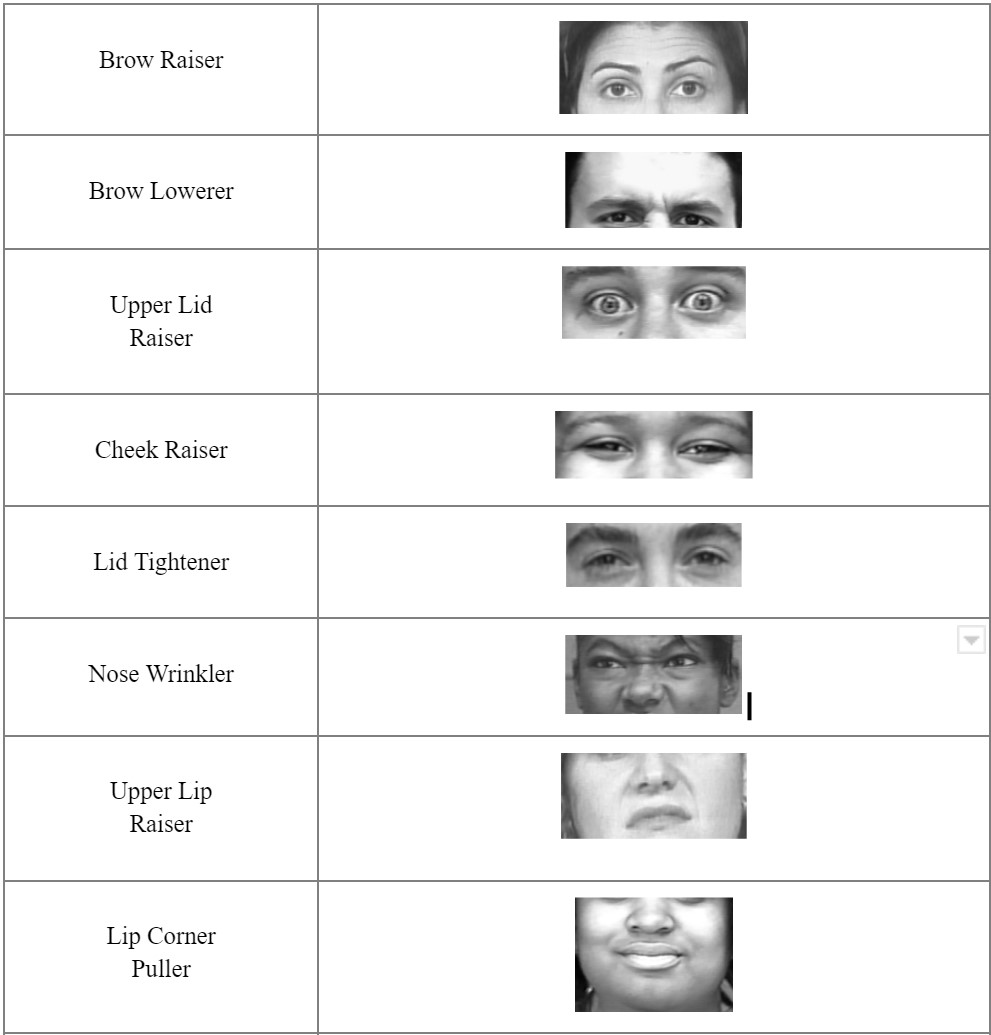

### 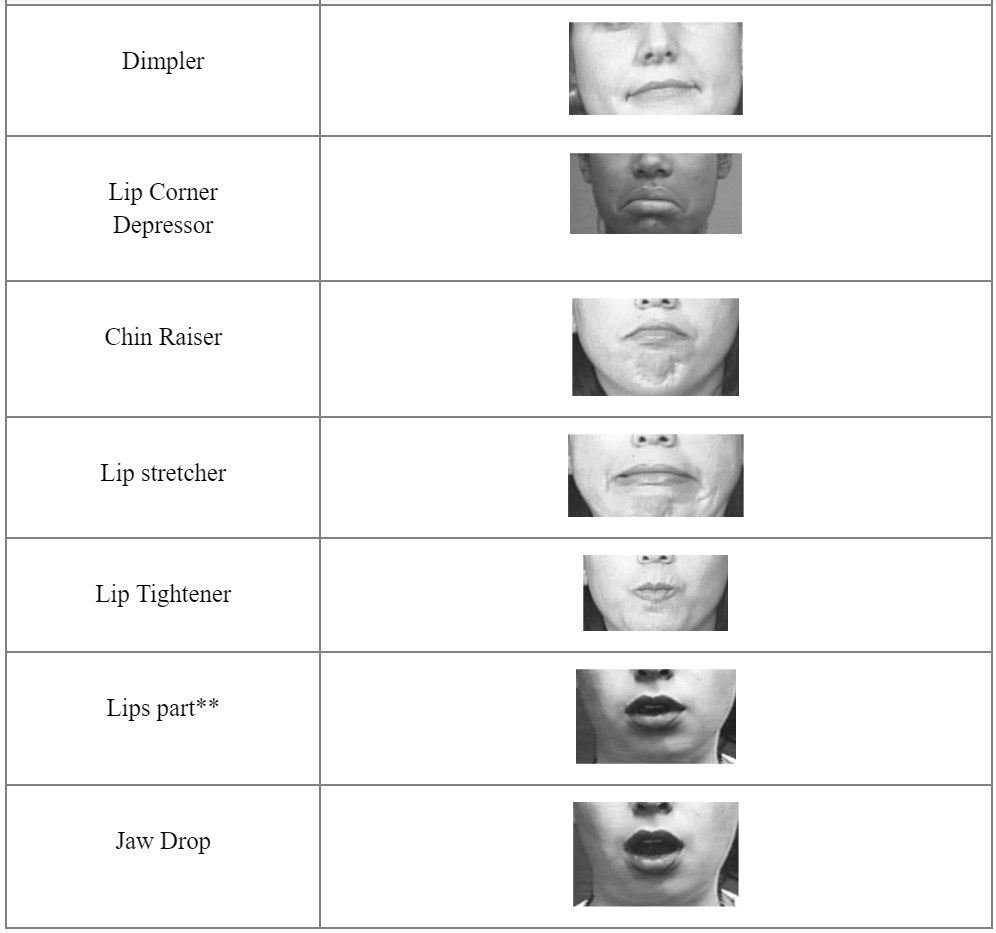
### Facial actions are measured in intensity. For example, you can raise your eyebrows little or a lot. The program will graph the intensity of the facial action that you choose.
<span style="color:red; font-size:150%">Run the next cell</span>

In [5]:
w = widgets.Dropdown(
    options=lib.AU,
    value='Upper Brow Raiser',
    description='Facial Action:',
)
def on_change(change):
    global facial_action
    if change['type'] == 'change' and change['name'] == 'value':
        graph_lib.facial_action = change['new']

w.observe(on_change)

display(w)

Dropdown(description='Facial Action:', options=('Upper Brow Raiser', 'Lower Brow Raiser', 'Brow Lowerer', 'Upp…

# Run the next cell to graph the intensity of the facial action you chose over time  

In [6]:
graph_lib.AU_figure()

# Using the facial features and facial action you chose, the robot can try to predict when the child is engaged or not. 
# Once you run the next cell, the graph will show the robot's prediction of engagement and the actual engagement 

In [7]:
features = []
if graph_lib.feature[0] == 1:
    for i in range(lib.coor_dir["eyebrow"][0], lib.coor_dir["eyebrow"][1]):
        features.append(' x_{}'.format(i))
        features.append(' y_{}'.format(i))
if graph_lib.feature[1] == 1:
    for i in range(lib.coor_dir["eye"][0], lib.coor_dir["eye"][1]):
        features.append(' x_{}'.format(i))
        features.append(' y_{}'.format(i))
if graph_lib.feature[2] == 1:
    for i in range(lib.coor_dir["jaw"][0], lib.coor_dir["jaw"][1]):
        features.append(' x_{}'.format(i))
        features.append(' y_{}'.format(i))
if graph_lib.feature[3] == 1:
    for i in range(lib.coor_dir["innerlip"][0], lib.coor_dir["innerlip"][1]):
        features.append(' x_{}'.format(i))
        features.append(' y_{}'.format(i))
if graph_lib.feature[4] == 1:
    for i in range(lib.coor_dir["outerlip"][0], lib.coor_dir["outerlip"][1]):
        features.append(' x_{}'.format(i))
        features.append(' y_{}'.format(i))
if graph_lib.feature[5] == 1:
    for i in range(lib.coor_dir["nose"][0], lib.coor_dir["nose"][1]):
        features.append(' x_{}'.format(i))
        features.append(' y_{}'.format(i))
if graph_lib.feature[6] == 1:
    features.append(' gaze_angle_x')
    features.append(' gaze_angle_y')
features.append(graph_lib.d_swap[graph_lib.facial_action])
X_train = graph_lib.df.loc[:, features]
X_train.drop(X_train.tail(5).index,
        inplace = True)
all = np.array(lib.ll_arr)
training_labels = pd.DataFrame(all, columns=['label'])
y_train = training_labels
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
graph_lib.pred_figure(y_pred)

C:\Users\ayush\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ayush\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be remov

[16:23:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
